In [32]:
# Box plot + swarm plot
import glob
import os
import sys
import ipdb
import numpy as np
import math
import pandas as pd
from pandas import compat
compat.PY3 = True
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
from pylab import savefig
from scipy import stats
import io


global indir
currentWorkingDirectory = os.getcwd()
indir = currentWorkingDirectory



In [34]:
#Study 1+2 combined
inFile = "21-0223b-import.csv"

Pos_df = pd.read_csv(indir + '/' + inFile,encoding='utf-8')

concatFullGraph_df = Pos_df  #for the graph

#if pleural only
#Pos_df = Pos_df[Pos_df['Sample Type']=='Pleural']

Pos_df.abs

<bound method NDFrame.abs of        BF        Sample Type New Diagnosis   Category  \
0     290            Pleural             -  CAPosCyto   
1     563         Peritoneal             -  CAPosCyto   
2     618            Pleural             -  CAPosCyto   
3     721            Pleural             -  CAPosCyto   
4     857        Pericardial             +  CAPosCyto   
..    ...                ...           ...        ...   
141  3164  Abdominal/Ascites             -    CytoPos   
142  3165  Abdominal/Ascites           NaN    NegCtrl   
143  3166  Abdominal/Ascites             -  NegPastCA   
144  3167  Abdominal/Ascites             -  NegPastCA   
145  3168  Abdominal/Ascites             -    CytoPos   

    NGS pos for CNVs and EBV  CategoryDataframe  Tumor Fraction  
0                          +                1.0        0.964735  
1                          +                1.0        0.473741  
2                          +                1.0        0.645275  
3                     


 cytoPos: 
 0.000000    14.285714
0.430832     4.761905
0.463125     3.174603
0.575950     3.174603
0.525731     1.587302
0.493024     1.587302
0.363478     1.587302
0.419917     1.587302
0.964735     1.587302
0.851302     1.587302
0.208868     1.587302
0.796014     1.587302
0.706398     1.587302
0.591420     1.587302
0.652766     1.587302
0.414240     1.587302
0.397860     1.587302
0.613166     1.587302
0.187292     1.587302
0.127334     1.587302
0.184962     1.587302
0.146824     1.587302
0.444959     1.587302
0.335732     1.587302
0.777360     1.587302
0.318207     1.587302
0.203514     1.587302
0.197310     1.587302
0.329824     1.587302
0.400080     1.587302
0.116479     1.587302
0.742987     1.587302
0.364196     1.587302
0.152103     1.587302
0.409515     1.587302
0.794192     1.587302
0.473741     1.587302
0.120311     1.587302
0.890100     1.587302
0.645275     1.587302
0.671314     1.587302
0.480798     1.587302
0.128740     1.587302
0.318624     1.587302
0.441496     1.5873

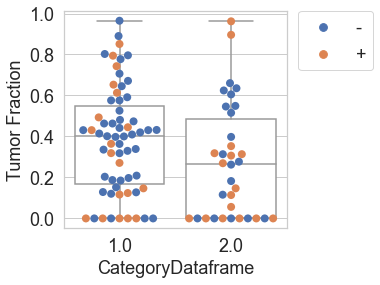

In [35]:


#fig = plt.figure(figsize=(6,4), dpi=150) # create figure

#CytoPos_df = Pos_df[Pos_df['CategoryDataframe'] == 'Cytology/Flow Positive']
#CytoNeg_df = Pos_df[Pos_df['CategoryDataframe'] == 'Cytology/Flow Negative']


#Pos_df = Pos_df[Pos_df['Sample Type']=='Pleural']

CytoPos_df = Pos_df[Pos_df['CategoryDataframe'] == 1]
CytoNeg_df = Pos_df[Pos_df['CategoryDataframe'] == 2]


print ("\n cytoPos: \n" , CytoPos_df['Tumor Fraction'].value_counts(normalize=True) * 100 )
print("Median: ", CytoPos_df.median() )
print("IQR: ", CytoPos_df.quantile(.25), CytoPos_df.quantile(.75) )
print ("\n cytoNeg: \n" , CytoNeg_df['Tumor Fraction'].value_counts(normalize=True) * 100 )
print("Median: ", CytoNeg_df.median() )
print("IQR: ", CytoNeg_df.quantile(.25), CytoPos_df.quantile(.75) )


plt.close()
f = plt.figure(figsize=(4,4))
fontparams = {'font.size':18, 'axes.labelsize':18, 'xtick.labelsize':18,'ytick.labelsize':18,'legend.fontsize':18}
plt.rcParams.update(fontparams)

ax = sns.boxplot(y="Tumor Fraction", x='CategoryDataframe', color="white", data=concatFullGraph_df)
#ax = sns.violinplot(y="Tumor Fraction", x='CategoryDataframe', color="white", data=concatFullGraph_df)

ax = sns.swarmplot(y="Tumor Fraction", x='CategoryDataframe', size=8,data=concatFullGraph_df, hue='New Diagnosis')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.ylabel('Tumor Fraction', fontsize=18)
#plt.xlabel('Cytology/Flow Positive   Probable', fontsize=24)

plt.rcParams['pdf.fonttype'] = 42
f.savefig('PosGoldStandards.pdf',format='pdf',transparent=True, bbox_inches='tight')


In [26]:
Pos_df

,BF,Sample Type,New Diagnosis,Category,NGS pos for CNVs and EBV,CategoryDataframe,Tumor Fraction
0,290,Pleural,-,CAPosCyto,+,1.0,0.964735
1,563,Peritoneal,-,CAPosCyto,+,1.0,0.473741
2,618,Pleural,-,CAPosCyto,+,1.0,0.645275
3,721,Pleural,-,CAPosCyto,+,1.0,0.401188
4,857,Pericardial,+,CAPosCyto,+,1.0,0.066788
...,...,...,...,...,...,...,...
141,3164,Abdominal/Ascites,-,CytoPos,Positive,1.0,0.335732
142,3165,Abdominal/Ascites,NaN,NegCtrl,Negative,NaN,0.000000
143,3166,Abdominal/Ascites,-,NegPastCA,Negative,NaN,0.000000
144,3167,Abdominal/Ascites,-,NegPastCA,Positive,NaN,0.341720


In [18]:
Organisms_dict = ['Aspergillus fumigatus','Aspergillus terreus','Coccidioides immitis','Cryptococcus neoformans','Talaromyces marneffei','Mycobacterium tuberculosis','Histoplasma capsulatum']
temp_df = pd.melt(microRawFocused_df,id_vars='Sample', value_vars=Organisms_dict, var_name='Organism', value_name='RPM')

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


/Users/weigu/Documents/software/miniconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 93.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/weigu/Documents/software/miniconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 96.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/weigu/Documents/software/miniconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 94.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/weigu/Documents/software/miniconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 96.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

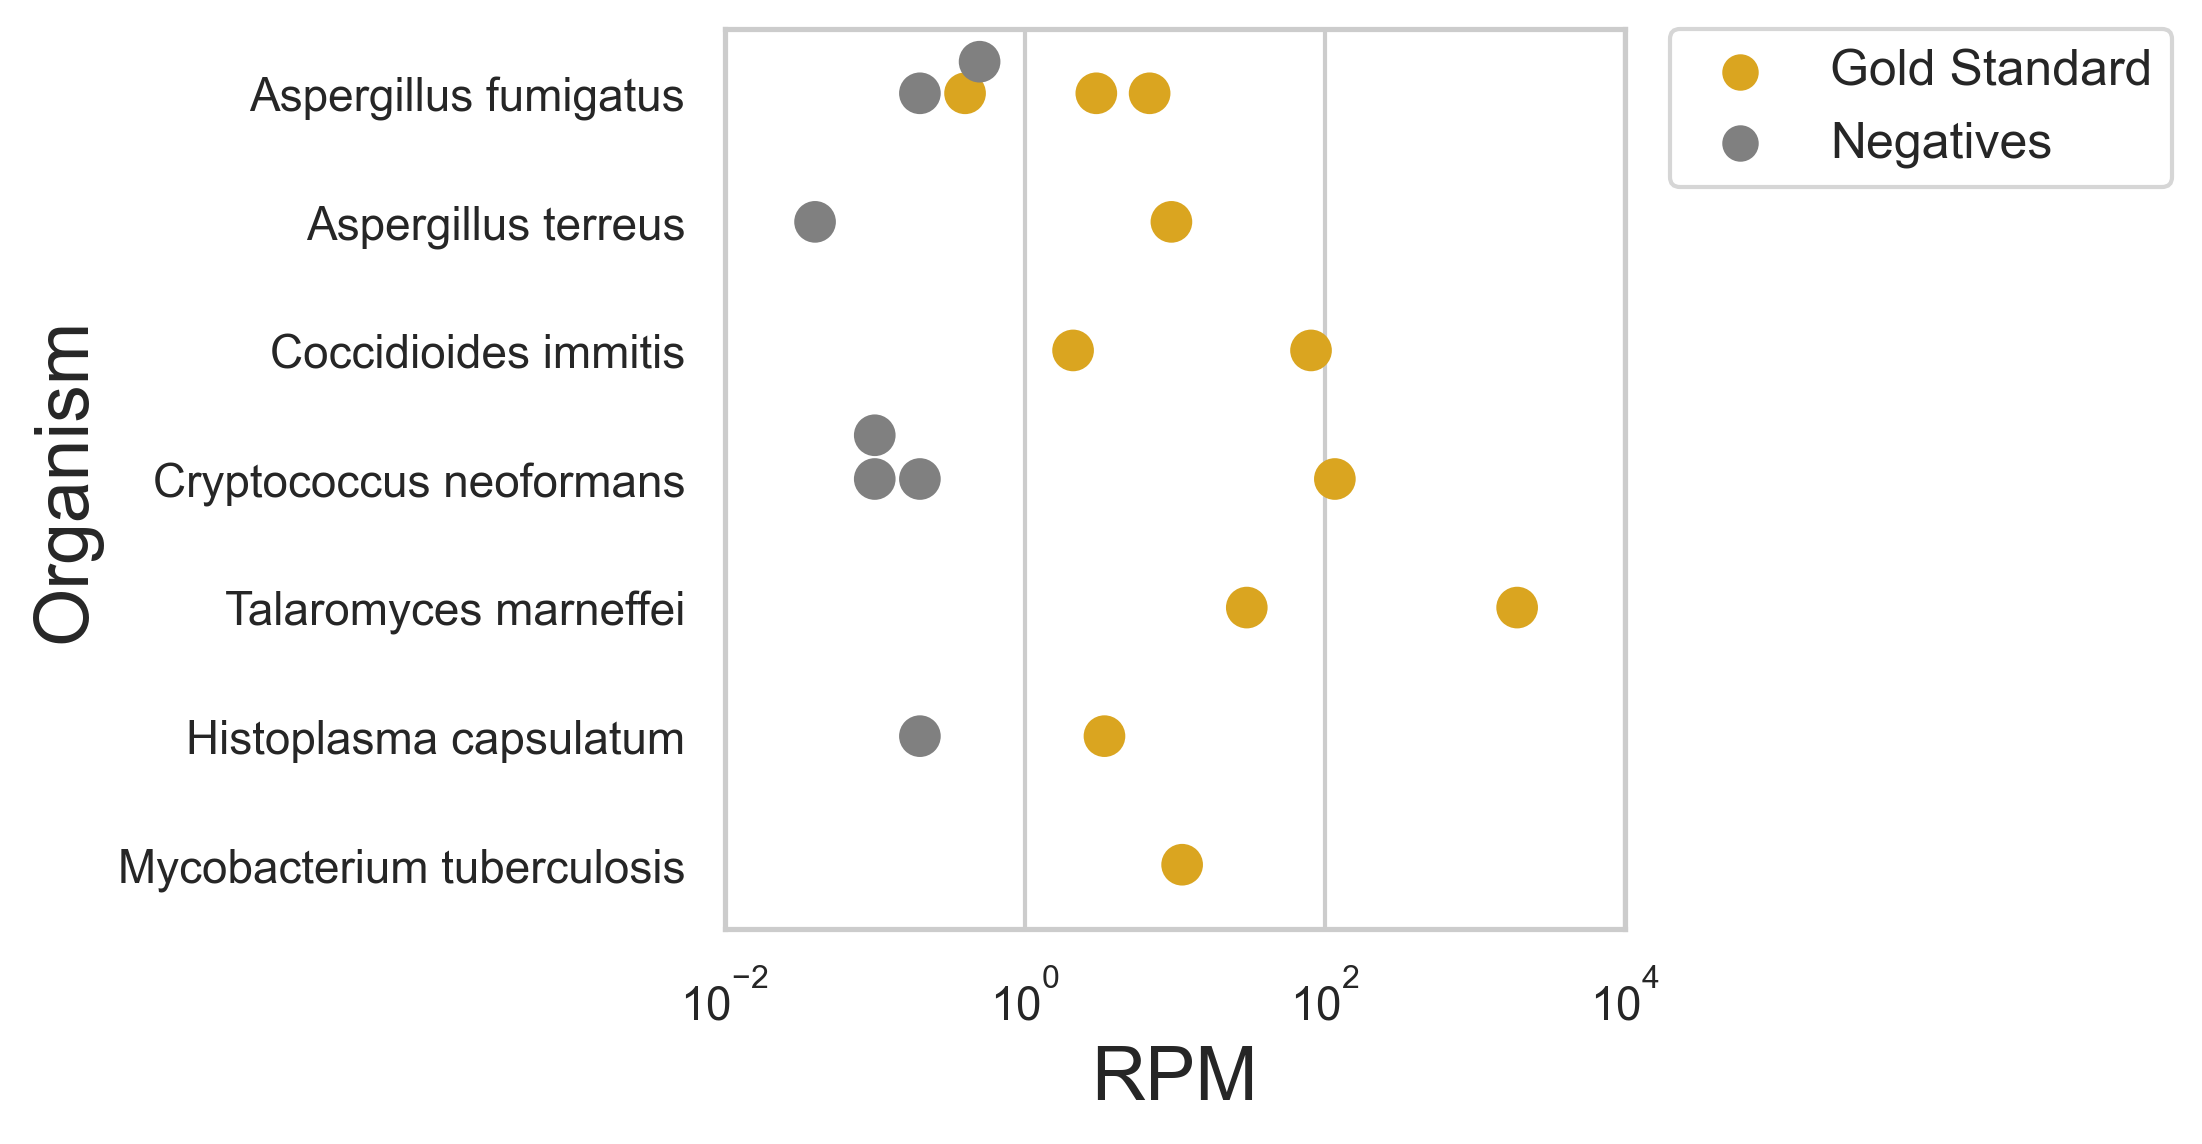

In [5]:
import ipdb
import numpy as np
import math
import pandas as pd
from pandas import compat
compat.PY3 = True
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
from pylab import savefig
from scipy import stats


inFile = "21-0301-micro8.csv"

#microRaw_df = pd.read_csv(indir + '/' + inFile, encoding='utf-8')
microRaw_df = pd.read_csv(indir + '/' + inFile, engine='python', encoding='utf-8', error_bad_lines=False)

#microRaw_df = pd.read_excel("19-0916-micro2-3.xlsx", sheet_name="19-0916-micro2-3", header=0, skip_footer=0)

micro_df = microRaw_df.replace(np.nan,'Negatives')




plt.close()
fig = plt.figure(figsize=(3,3), dpi=300) # create figure
rect = 0,0,1,1 # create an rectangle for the new axis
log_ax = fig.add_axes(rect) # create a new axis (or use an existing one)
log_ax.set_xscale("log") # log first

plt.rcParams.update({'font.size':15, 'axes.labelsize':15, 'xtick.labelsize':15,'ytick.labelsize':15,'legend.fontsize':12})


ax = sns.swarmplot(y="Organism", x='RPM', size=10,hue='GoldStandard', data=micro_df,palette=['goldenrod','gray'])

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Organism', fontsize=18)
plt.xlabel('RPM', fontsize=18)
plt.xlim([0.01, 10000])

plt.rcParams['pdf.fonttype'] = 42
plt.savefig('MicroSwarm.pdf',format='pdf',transparent=True, bbox_inches='tight')




In [4]:
micro_df

,Sample,Organism,RPM,GoldStandard,Type,SampleType,mNGSRun
0,151,Aspergillus fumigatus,1.200,Gold Standard,MicroSelected,BAL,BF3; BFhiseqMix1
1,151,Aspergillus terreus,0.000,Negatives,MicroSelected,BAL,BF3; BFhiseqMix1
2,151,Coccidioides immitis,0.000,Negatives,MicroSelected,BAL,BF3; BFhiseqMix1
3,151,Cryptococcus neoformans,0.000,Negatives,MicroSelected,BAL,BF3; BFhiseqMix1
4,151,Talaromyces marneffei,0.000,Negatives,MicroSelected,BAL,BF3; BFhiseqMix1
...,...,...,...,...,...,...,...
884,653,Coccidioides immitis,0.000,Negatives,MicroSelected,Pleural,BF23g
885,653,Cryptococcus neoformans,0.000,Negatives,MicroSelected,Pleural,BF23g
886,653,Talaromyces marneffei,30.215,Gold Standard,MicroSelected,Pleural,BF23g
887,653,Histoplasma capsulatum,0.000,Negatives,MicroSelected,Pleural,BF23g
